<a href="https://colab.research.google.com/github/helloitsdaksh/Tensorflow_colab/blob/main/03_Convolutional_Neural_Networks_In_Tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Convolutional Neural Networks and Computer Vision 
Computer vision is a practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

Architecture of a CNN.
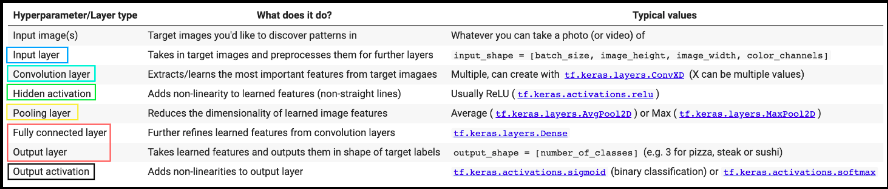

## Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. 

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We'll download the `pizza_steak` subset .zip file and unzip it.

In [4]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-30 16:36:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   146MB/s    in 0.7s    

2021-06-30 16:36:39 (146 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

Let's inspect each of the directories we've downloaded.

To so do, we can use the command `ls` which stands for list.

In [5]:
!ls pizza_steak

test  train


In [6]:
!ls pizza_steak/test

pizza  steak


In [7]:
!ls pizza_steak/train

pizza  steak


In [8]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [9]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [10]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [11]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names[1:]

array(['pizza', 'steak'], dtype='<U9')

In [12]:
# Let's Visualize our images
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


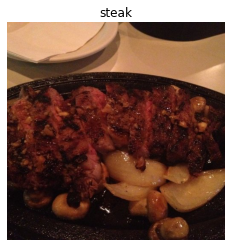

In [13]:
img = view_random_image("pizza_steak/train/","steak")

In [14]:
# this image is actually a matrix of shape(widht, height, colour channels)
img

array([[[205, 152, 108],
        [208, 156, 109],
        [211, 159, 112],
        ...,
        [ 24,  17,   9],
        [ 24,  17,   9],
        [ 26,  19,  11]],

       [[212, 159, 115],
        [214, 162, 115],
        [217, 163, 117],
        ...,
        [ 27,  20,  12],
        [ 28,  21,  13],
        [ 29,  22,  16]],

       [[213, 159, 115],
        [215, 161, 115],
        [216, 162, 116],
        ...,
        [ 25,  18,  10],
        [ 26,  19,  13],
        [ 27,  20,  14]],

       ...,

       [[ 26,  22,  21],
        [ 23,  17,  17],
        [ 21,  15,  15],
        ...,
        [ 21,  12,  15],
        [ 20,  11,  14],
        [ 19,  10,  13]],

       [[ 23,  19,  16],
        [ 23,  18,  15],
        [ 23,  18,  15],
        ...,
        [ 25,  16,  19],
        [ 21,  12,  15],
        [ 18,   9,  12]],

       [[ 20,  16,  13],
        [ 22,  18,  15],
        [ 25,  20,  17],
        ...,
        [ 20,  11,  14],
        [ 21,  12,  15],
        [ 23,  14,  17]]

In [15]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[205, 152, 108],
        [208, 156, 109],
        [211, 159, 112],
        ...,
        [ 24,  17,   9],
        [ 24,  17,   9],
        [ 26,  19,  11]],

       [[212, 159, 115],
        [214, 162, 115],
        [217, 163, 117],
        ...,
        [ 27,  20,  12],
        [ 28,  21,  13],
        [ 29,  22,  16]],

       [[213, 159, 115],
        [215, 161, 115],
        [216, 162, 116],
        ...,
        [ 25,  18,  10],
        [ 26,  19,  13],
        [ 27,  20,  14]],

       ...,

       [[ 26,  22,  21],
        [ 23,  17,  17],
        [ 21,  15,  15],
        ...,
        [ 21,  12,  15],
        [ 20,  11,  14],
        [ 19,  10,  13]],

       [[ 23,  19,  16],
        [ 23,  18,  15],
        [ 23,  18,  15],
        ...,
        [ 25,  16,  19],
        [ 21,  12,  15],
        [ 18,   9,  12]],

       [[ 20,  16,  13],
        [ 22,  18,  15],
        [ 25,  20,  17],
        ...,
        [ 20,  11,  1

In [16]:
# normalizztion of the image
img/255.0

array([[[0.80392157, 0.59607843, 0.42352941],
        [0.81568627, 0.61176471, 0.42745098],
        [0.82745098, 0.62352941, 0.43921569],
        ...,
        [0.09411765, 0.06666667, 0.03529412],
        [0.09411765, 0.06666667, 0.03529412],
        [0.10196078, 0.0745098 , 0.04313725]],

       [[0.83137255, 0.62352941, 0.45098039],
        [0.83921569, 0.63529412, 0.45098039],
        [0.85098039, 0.63921569, 0.45882353],
        ...,
        [0.10588235, 0.07843137, 0.04705882],
        [0.10980392, 0.08235294, 0.05098039],
        [0.11372549, 0.08627451, 0.0627451 ]],

       [[0.83529412, 0.62352941, 0.45098039],
        [0.84313725, 0.63137255, 0.45098039],
        [0.84705882, 0.63529412, 0.45490196],
        ...,
        [0.09803922, 0.07058824, 0.03921569],
        [0.10196078, 0.0745098 , 0.05098039],
        [0.10588235, 0.07843137, 0.05490196]],

       ...,

       [[0.10196078, 0.08627451, 0.08235294],
        [0.09019608, 0.06666667, 0.06666667],
        [0.08235294, 0

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

## An end-to-end example

* Load out images
* Preprocess our images
* Build a CNN to find patterns in our iamges
* Compile our CNN
* Fit the CNN to our training data

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called scaling/ normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data form directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               seed = 42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode = "binary",
                                             seed = 42)
# Build the CNN model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])
# compile the CNN model
model_1.compile(loss= "binary_crossentropy",
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.6263 - accuracy: 0.6300 - val_loss: 0.3821 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4262 - accuracy: 0.8087 - val_loss: 0.3911 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4161 - accuracy: 0.8120 - val_loss: 0.3477 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3626 - accuracy: 0.8433 - val_loss: 0.3093 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3211 - accuracy: 0.8660 - val_loss: 0.2904 - val_accuracy: 0.8780
